#**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.svm import SVC
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report

#**Dataset**

In [2]:
df_train = pd.read_csv("Datasets/regression/housing_coursework_train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("Datasets/regression/housing_coursework_test.csv", encoding="ISO-8859-1")


In [3]:
df_train.head(10)

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.21,37.83,34,5065,788.0,1627,766,6.8976,333300,NEAR BAY
1,2,-122.22,37.77,52,391,128.0,520,138,1.6471,95000,NEAR BAY
2,3,-122.23,37.79,30,610,145.0,425,140,1.6198,122700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
5,6,-122.19,37.76,26,1293,297.0,984,303,1.9479,85800,NEAR BAY
6,7,-122.17,37.74,43,818,193.0,494,179,2.4776,101600,NEAR BAY
7,8,-122.18,37.75,46,941,218.0,621,195,1.3250,87100,NEAR BAY
8,9,-122.16,37.75,38,2457,624.0,1516,482,1.5625,91700,NEAR BAY
9,10,-122.14,37.75,33,1334,200.0,579,202,6.8323,255900,NEAR BAY


In [67]:
def scatter_plot(feature, target):
    plt.figure(figsize=(8, 4))
    plt.scatter(
        df_train[feature],
        df_train[target],
        c='black'
    )
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

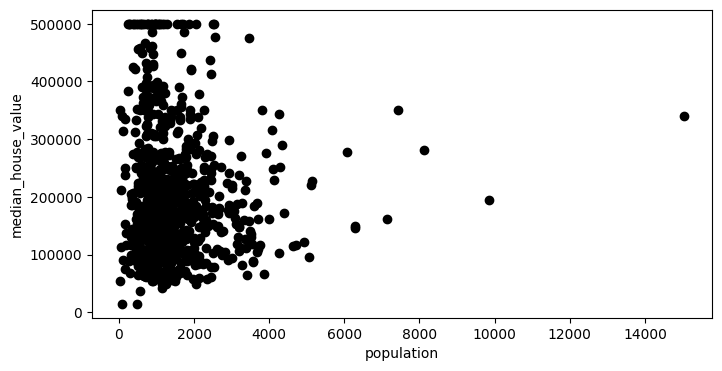

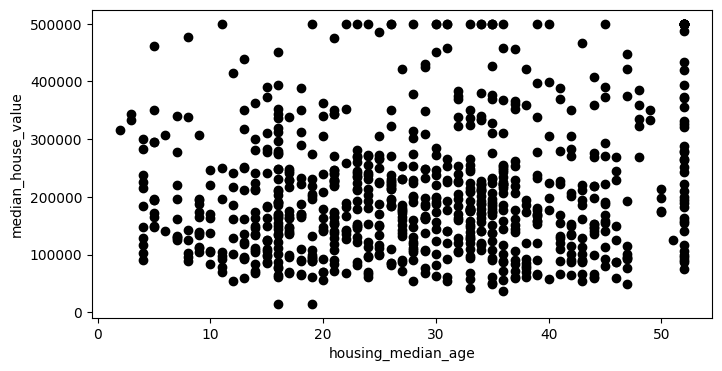

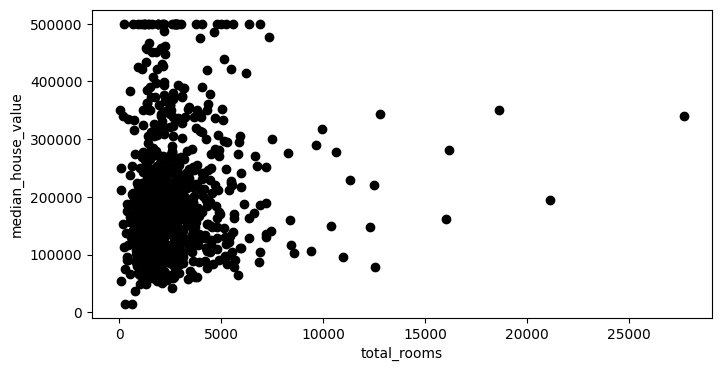

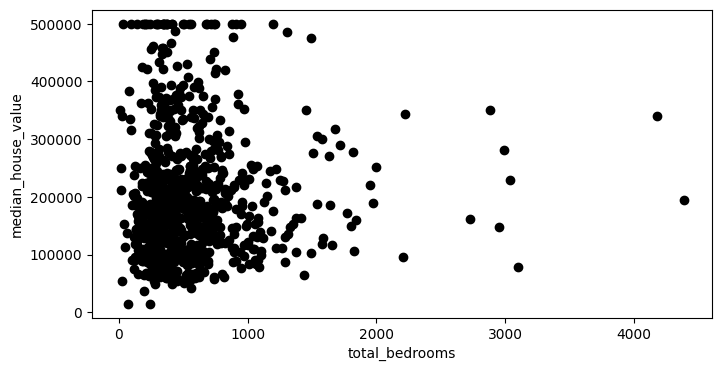

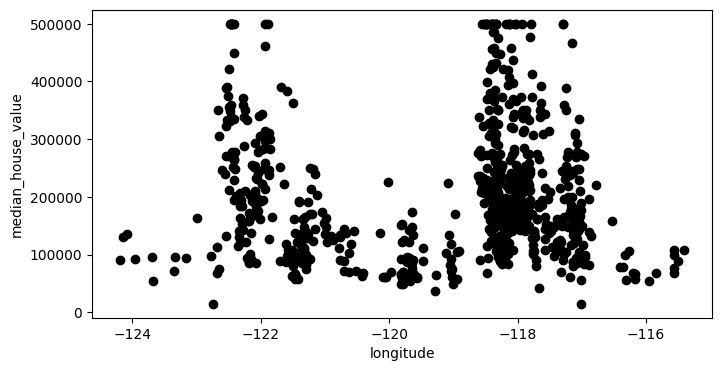

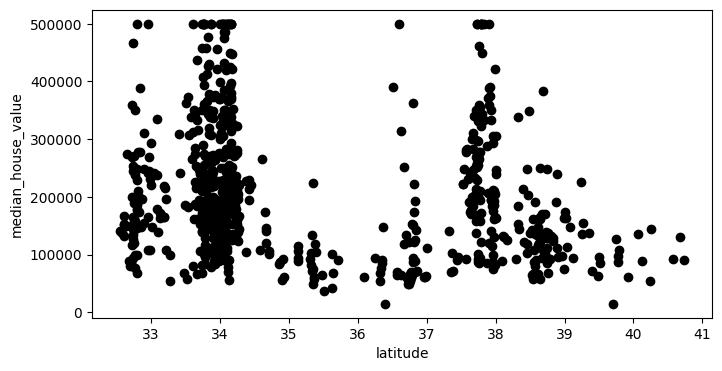

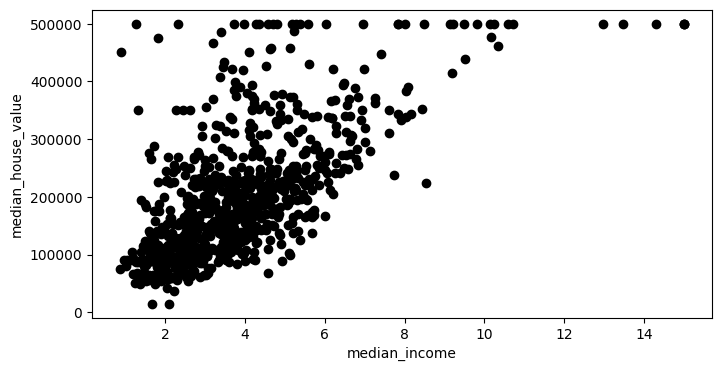

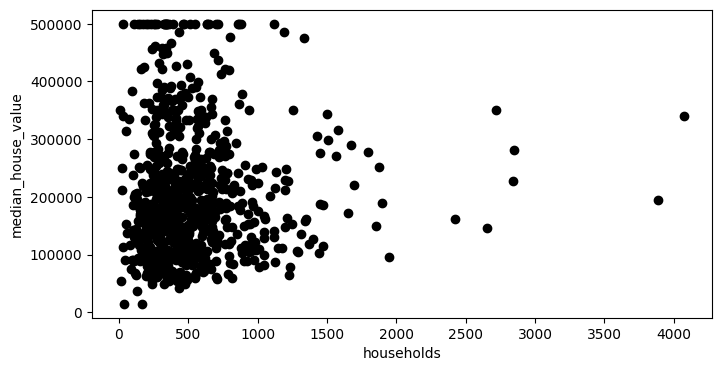

In [5]:
#Attempting to identifying correlations
scatter_plot('population', 'median_house_value')
scatter_plot('housing_median_age', 'median_house_value')
scatter_plot('total_rooms', 'median_house_value')
scatter_plot('total_bedrooms', 'median_house_value')
scatter_plot('longitude', 'median_house_value')
scatter_plot('latitude', 'median_house_value')
scatter_plot('median_income', 'median_house_value')
scatter_plot('households', 'median_house_value')







#**Preprocessing**

In [6]:
#Detecting NaN vaues
print("Trainin set: \n",df_train.loc[df_train.isnull().any(axis=1)])
print("Test set: \n",df_test.loc[df_test.isnull().any(axis=1)])

Trainin set: 
      No.  longitude  latitude  housing_median_age  total_rooms  \
72    73    -122.08     37.88                  26         2947   
168  169    -118.28     34.25                  29         2559   
236  237    -118.38     34.05                  49          702   
548  549    -117.87     33.83                  27         2287   
621  622    -116.21     33.75                  22          894   
740  741    -117.02     32.66                  19          771   
786  787    -122.45     37.77                  52         2602   
792  793    -122.50     37.75                  45         1620   

     total_bedrooms  population  households  median_income  \
72              NaN         825         626         2.9330   
168             NaN        1886         769         2.6036   
236             NaN         458         187         4.8958   
548             NaN        1140         351         5.6163   
621             NaN         830         202         3.0673   
740             Na

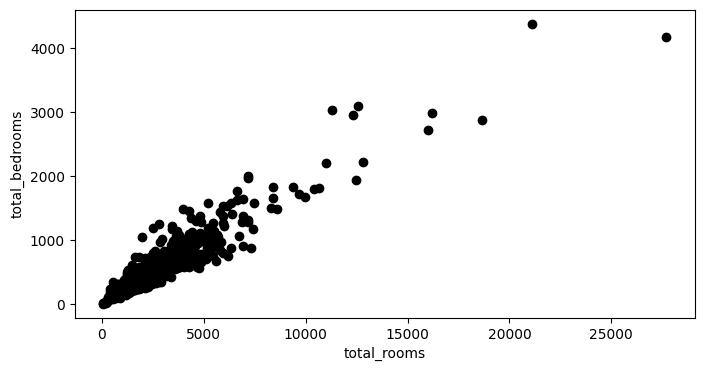

In [7]:
#Filling Nan total_bedrooms data points with using the average ratio of bedrooms to total rooms.
scatter_plot('total_rooms', 'total_bedrooms')

sum_total_rooms = df_train['total_rooms'].sum()

sum_total_bedrooms = df_train['total_bedrooms'].sum()

average_room_bedroom_ratio = sum_total_bedrooms/sum_total_rooms
for index, row in df_train.iterrows():
    if(np.isnan(row['total_bedrooms'])):
        df_train.at[index, 'total_bedrooms',] = row['total_rooms'] * average_room_bedroom_ratio

sum_total_rooms = df_test['total_rooms'].sum()

sum_total_bedrooms = df_test['total_bedrooms'].sum()

average_room_bedroom_ratio = sum_total_bedrooms/sum_total_rooms
for index, row in df_test.iterrows():
    if(np.isnan(row['total_bedrooms'])):
        df_test.at[index, 'total_bedrooms',] = row['total_rooms'] * average_room_bedroom_ratio

In [8]:
# Integer encoding ocean proximity
df_train['ocean_proximity']=np.where(df_train['ocean_proximity'] == 'INLAND', 0,
                            np.where(df_train['ocean_proximity'] == '<1H OCEAN', 1,
                            np.where(df_train['ocean_proximity'] == 'NEAR OCEAN', 2,
                            np.where(df_train['ocean_proximity'] == 'NEAR BAY', 3 , df_train['ocean_proximity']))))

df_test['ocean_proximity']=np.where(df_test['ocean_proximity'] == 'INLAND', 0,
                            np.where(df_test['ocean_proximity'] == '<1H OCEAN', 1,
                            np.where(df_test['ocean_proximity'] == 'NEAR OCEAN', 2,
                            np.where(df_test['ocean_proximity'] == 'NEAR BAY', 3 , df_test['ocean_proximity']))))                           
df_train.head(10)

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.21,37.83,34,5065,788.0,1627,766,6.8976,333300,3
1,2,-122.22,37.77,52,391,128.0,520,138,1.6471,95000,3
2,3,-122.23,37.79,30,610,145.0,425,140,1.6198,122700,3
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,3
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,3
5,6,-122.19,37.76,26,1293,297.0,984,303,1.9479,85800,3
6,7,-122.17,37.74,43,818,193.0,494,179,2.4776,101600,3
7,8,-122.18,37.75,46,941,218.0,621,195,1.3250,87100,3
8,9,-122.16,37.75,38,2457,624.0,1516,482,1.5625,91700,3
9,10,-122.14,37.75,33,1334,200.0,579,202,6.8323,255900,3


In [9]:
# Dropping irrelevant features
df_train_lasso = df_train.drop(columns=['No.'])

df_test_lasso = df_test.drop(columns=['No.'])

df_train= df_train.drop(columns=['No.', 'households','housing_median_age'])

df_test = df_test.drop(columns=['No.','households', 'housing_median_age'])

df_train.head(10)

,longitude,latitude,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity
0,-122.21,37.83,5065,788.0,1627,6.8976,333300,3
1,-122.22,37.77,391,128.0,520,1.6471,95000,3
2,-122.23,37.79,610,145.0,425,1.6198,122700,3
3,-122.20,37.78,2300,443.0,1225,3.5398,158400,3
4,-122.19,37.79,954,217.0,546,2.6667,172800,3
5,-122.19,37.76,1293,297.0,984,1.9479,85800,3
6,-122.17,37.74,818,193.0,494,2.4776,101600,3
7,-122.18,37.75,941,218.0,621,1.3250,87100,3
8,-122.16,37.75,2457,624.0,1516,1.5625,91700,3
9,-122.14,37.75,1334,200.0,579,6.8323,255900,3


In [10]:
#Shuffle dataset
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.head(10)

df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.head(10)


,longitude,latitude,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity
0,-122.87,38.61,2676,521.0,1456,3.7361,173700,1
1,-122.03,37.35,1156,198.0,455,7.2779,292900,1
2,-119.34,36.22,2708,460.0,1260,3.0905,78200,0
3,-120.65,35.32,626,212.0,3574,1.0298,300000,2
4,-119.05,34.21,4357,926.0,2110,3.0119,218200,1
5,-119.00,36.05,3208,691.0,1986,1.5506,52300,0
6,-119.06,34.24,7436,984.0,2982,7.6775,391200,1
7,-122.68,38.48,1575,262.0,716,5.3409,244600,1
8,-119.52,34.41,4489,800.0,2867,4.8060,279700,1
9,-122.25,40.66,2771,546.0,1423,3.6413,108500,0


In [11]:
#Splitting the data
X_train= df_train.drop(columns=['median_house_value'])

y_train= df_train['median_house_value']

X_test= df_test.drop(columns=['median_house_value'])
y_test= df_test['median_house_value']

X_train_lasso = df_train_lasso.drop(columns=['median_house_value'])

y_train_lasso = df_train_lasso['median_house_value']

X_test_lasso = df_test_lasso.drop(columns=['median_house_value'])
y_test_lasso = df_test_lasso['median_house_value']

#**Training and tuning**

Linear Regression

In [12]:
linearreg_model = LinearRegression().fit(X_train, y_train)

Lasso Regression

In [13]:
#Trial and error tuning through GridSearch
parameters = {'alpha': [0.2, 0.3 ,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
lasso_grid = GridSearchCV(Lasso(), parameters)
lasso_grid.fit(X_train_lasso,y_train_lasso)
best_alpha = lasso_grid.best_params_['alpha']
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=1)

#**Final Results**

In [15]:
print("Test case actual price:" , df_test['median_house_value'].head(1)[0])
print("--------------")
y_pred_lasso = lasso_model.predict(X_test_lasso)
print("Lasso Regression")
print("Test case predicted price:", lasso_model.predict(X_test_lasso.head(1))[0])
print("Model R2 Score:",r2_score(y_test_lasso, y_pred_lasso))
print("Model RMSE:",mean_squared_error(y_test_lasso, y_pred_lasso, squared = False))
print("Model MAE:",mean_absolute_error(y_test_lasso, y_pred_lasso))

print("--------------")

y_pred_linear = linearreg_model.predict(X_test)
print("Linear Regression")
print("Test case predicted price:", linearreg_model.predict(X_test.head(1))[0])
print("Model R2 Score:",r2_score(y_test, y_pred_linear))
print("Model RMSE:",mean_squared_error(y_test, y_pred_linear, squared = False))
print("Model MAE:",mean_absolute_error(y_test, y_pred_linear))






Test case actual price: 173700
--------------
Lasso Regression
Test case predicted price: 70457.57793933759
Model R2 Score: 0.7115755411286039
Model RMSE: 67071.20673217127
Model MAE: 50520.60613426608
--------------
Linear Regression
Test case predicted price: 216440.55443466548
Model R2 Score: 0.704116499372069
Model RMSE: 67932.94635727337
Model MAE: 52300.698682483264


**#Classification**

#**Dataset**

In [49]:
df_train = pd.read_csv("Datasets/classification/Titanic_train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("Datasets/classification/Titanic_test.csv", encoding="ISO-8859-1")


In [50]:
df_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1


In [51]:
df_train['Target: Survived'].value_counts()

0    394
1    256
Name: Target: Survived, dtype: int64

In [ ]:
def scatter_plot(feature, target):
    plt.figure(figsize=(8, 4))
    plt.scatter(
        df_train[feature],
        df_train[target],
        c='black'
    )
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

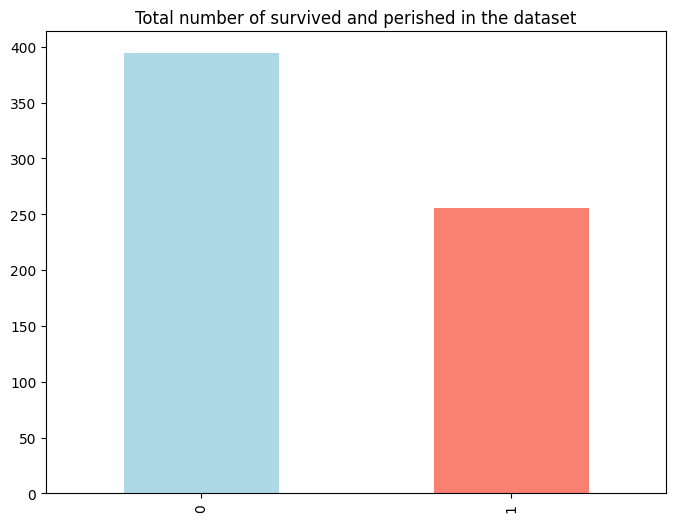

In [52]:
plt.figure(figsize=(8,6))

df_train['Target: Survived'].value_counts().plot.bar(color = ["lightblue","salmon"])
plt.title('Total number of survived and perished in the dataset')
plt.show()

#**Preprocessing**

In [53]:
#Filling empty Age data points with the average age to dampen their effect.
average_age = df_train['Age'].mean()

df_train.loc[df_train['Age'].isnull(),'Age'] = average_age
df_train.head(10)

average_age = df_test['Age'].mean()

df_test.loc[df_test['Age'].isnull(),'Age'] = average_age

#Dropping rows with NaN values under Embarked
df_train = df_train[df_train['Embarked'].notna()]
df_test = df_test[df_test['Embarked'].notna()]

df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Mitkoff, Mr. Mito",male,29.2471,0,0,349221,7.8958,S,0
1,2,2,"Doling, Miss. Elsie",female,18.0000,0,1,231919,23.0000,S,1
2,3,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0000,0,0,8475,8.4333,S,0
3,4,3,"O'Leary, Miss. Hanora ""Norah""",female,29.2471,0,0,330919,7.8292,Q,1
4,5,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0000,0,0,365226,6.7500,Q,0
5,6,2,"Hickman, Mr. Leonard Mark",male,24.0000,2,0,S.O.C. 14879,73.5000,S,0
6,7,3,"Radeff, Mr. Alexander",male,29.2471,0,0,349223,7.8958,S,0
7,8,3,"Bourke, Mrs. John (Catherine)",female,32.0000,1,1,364849,15.5000,Q,0
8,9,2,"Eitemiller, Mr. George Floyd",male,23.0000,0,0,29751,13.0000,S,0
9,10,1,"Newell, Mr. Arthur Webster",male,58.0000,0,2,35273,113.2750,C,0


In [54]:
#Shuffle dataset
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train.head(10)

df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,60,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.2471,1,1,2661,15.2458,C,1
1,144,1,"Hoyt, Mr. William Fisher",male,29.2471,0,0,PC 17600,30.6958,C,0
2,91,1,"Hawksford, Mr. Walter James",male,29.2471,0,0,16988,30.0000,S,1
3,74,2,"Hodges, Mr. Henry Price",male,50.0000,0,0,250643,13.0000,S,0
4,236,3,"Rice, Mrs. William (Margaret Norton)",female,39.0000,0,5,382652,29.1250,Q,0
5,113,3,"Barah, Mr. Hanna Assi",male,20.0000,0,0,2663,7.2292,C,1
6,117,1,"Brewe, Dr. Arthur Jackson",male,29.2471,0,0,112379,39.6000,C,0
7,10,1,"Newell, Mr. Arthur Webster",male,58.0000,0,2,35273,113.2750,C,0
8,164,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0000,4,2,347082,31.2750,S,0
9,37,3,"Panula, Mr. Jaako Arnold",male,14.0000,4,1,3101295,39.6875,S,0


In [55]:
# Dropping columns deemed to be irrelevant
df_train = df_train.drop(columns=['PassengerId','Name', 'Ticket', 'Fare'])

df_test = df_test.drop(columns=['PassengerId','Name', 'Ticket', 'Fare'])


df_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Target: Survived
0,3,female,29.875,1,0,Q,1
1,3,female,17.000,0,0,C,0
2,3,female,21.000,0,0,S,1
3,3,female,29.875,0,0,Q,1
4,1,female,23.000,3,2,S,1
5,3,male,29.875,0,0,S,0
6,3,male,50.000,0,0,S,0
7,1,male,52.000,0,0,S,1
8,3,male,21.000,0,0,Q,0
9,3,male,29.000,0,0,S,0


In [56]:
#One hot encoding
df_train['Sex']=df_train['Sex'].apply(lambda x: 1 if x=='male' else 0)
df_test['Sex']=df_test['Sex'].apply(lambda x: 1 if x=='male' else 0)

df_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Target: Survived
0,3,0,29.875,1,0,Q,1
1,3,0,17.000,0,0,C,0
2,3,0,21.000,0,0,S,1
3,3,0,29.875,0,0,Q,1
4,1,0,23.000,3,2,S,1
5,3,1,29.875,0,0,S,0
6,3,1,50.000,0,0,S,0
7,1,1,52.000,0,0,S,1
8,3,1,21.000,0,0,Q,0
9,3,1,29.000,0,0,S,0


In [57]:
# Integer encoding ocean proximity

df_train['Embarked']=np.where(df_train['Embarked'] == 'S', 0,
                            np.where(df_train['Embarked'] == 'C', 1,
                            np.where(df_train['Embarked'] == 'Q', 2, df_train['Embarked'])))

df_test['Embarked']=np.where(df_test['Embarked'] == 'S', 0,
                            np.where(df_test['Embarked'] == 'C', 1,
                            np.where(df_test['Embarked'] == 'Q', 2, df_test['Embarked'])))

df_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Target: Survived
0,3,0,29.875,1,0,2,1
1,3,0,17.000,0,0,1,0
2,3,0,21.000,0,0,0,1
3,3,0,29.875,0,0,2,1
4,1,0,23.000,3,2,0,1
5,3,1,29.875,0,0,0,0
6,3,1,50.000,0,0,0,0
7,1,1,52.000,0,0,0,1
8,3,1,21.000,0,0,2,0
9,3,1,29.000,0,0,0,0


In [58]:
#Splitting the data
X_train= df_train.drop(columns=['Target: Survived'])

y_train= df_train['Target: Survived']

X_test= df_test.drop(columns=['Target: Survived'])
y_test= df_test['Target: Survived']

#**Training and Tuning**

SVM

In [59]:
# This block will take a while to run as it is fitting 400 times.
tuned_parameters = {
    'kernel': ['rbf'],
    'gamma': [1,0.1,0.01,0.001],
    'C':[0.1,1,10,100,1000]
    }
svm_grid = GridSearchCV(SVC(),tuned_parameters,refit=True,verbose=3)
svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [60]:
print("Best parameters:", svm_grid.best_params_)
print("Accuracy:", svm_grid.score(X_test,y_test))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.8375


#**Training with tuned parameters**

In [61]:
best_kernel = svm_grid.best_params_['kernel']
best_gamma = svm_grid.best_params_['gamma']
best_C = svm_grid.best_params_['C']
tuned_svm= SVC(kernel=best_kernel,C=best_C,gamma=best_gamma)

In [62]:
tuned_svm.fit(X_train,y_train)

SVC(C=100, gamma=0.01)

Logistic Regression

In [63]:
parameters = {
    'penalty' :  ['l2'], 
    'C'       : [100, 10, 1.0, 0.1, 0.01],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

gridsearch_logreg = GridSearchCV(LogisticRegression(),                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)    

In [64]:
gridsearch_logreg.fit(X_train,y_train)
print("Tuned Hyperparameters :", gridsearch_logreg.best_params_)
print("Accuracy :",gridsearch_logreg.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.8026442307692309


In [65]:
tuned_logreg = LogisticRegression(C = gridsearch_logreg.best_params_['C'], 
                            penalty = gridsearch_logreg.best_params_['penalty'], 
                            solver = gridsearch_logreg.best_params_['solver'])
tuned_logreg.fit(X_train,y_train)
y_pred = tuned_logreg.predict(X_test)
print("Accuracy:",tuned_logreg.score(X_test, y_test))

Accuracy: 0.8


#**Final Results**

In [66]:
y_pred_SVM= tuned_svm.predict(X_test)
y_pred_logreg = tuned_logreg.predict(X_test)

print(classification_report(y_test, list( map(lambda x: 1 if x>= 0.5 else 0 , y_pred_SVM))))
print(classification_report(y_test, list( map(lambda x: 1 if x>= 0.5 else 0 , y_pred_logreg))))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       155
           1       0.81      0.71      0.75        85

    accuracy                           0.84       240
   macro avg       0.83      0.81      0.82       240
weighted avg       0.84      0.84      0.83       240

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       155
           1       0.77      0.62      0.69        85

    accuracy                           0.80       240
   macro avg       0.79      0.76      0.77       240
weighted avg       0.80      0.80      0.79       240

